In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Define the list of tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [3]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [4]:
# Fetch data for each stock and define them as individual DataFrames
company_data = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Add company names
for stock, data in company_data.items():
    data['company_name'] = stock.upper()

In [6]:
# List of company DataFrames
company_list = list(company_data.values())

In [10]:
# Describe and info for AAPL as an example
print(company_data['AAPL'].describe())
print(company_data['AAPL'].info())


             Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   188.554560  190.341440  186.976520  188.752800  188.196727   
std     16.945140   17.255532   16.578659   16.956187   17.096504   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    175.322498  177.135002  173.797497  175.552505  174.706825   
50%    185.380005  186.845001  183.574997  185.574997  184.873466   
75%    194.404999  195.390003  193.090000  194.245003  193.707447   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.500000e+02  
mean   6.041835e+07  
std    2.486774e+07  
min    2.404830e+07  
25%    4.657705e+07  
50%    5.373395e+07  
75%    6.600965e+07  
max    2.464214e+08  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-08-21 to 2024-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------   

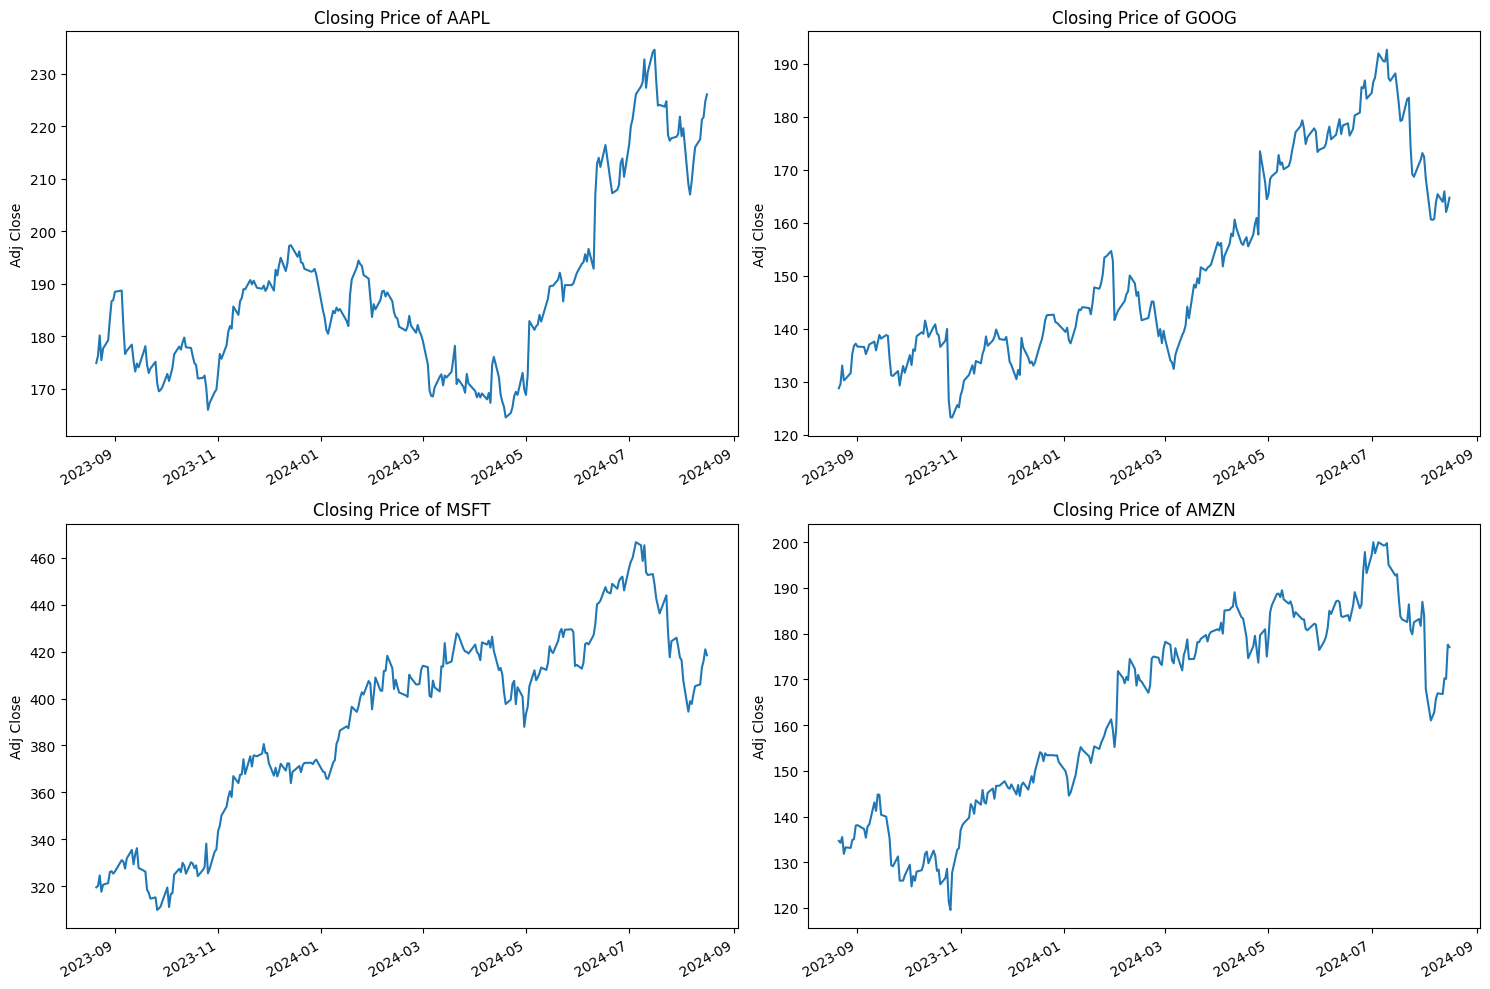

In [11]:
# Plot historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, data) in enumerate(company_data.items(), 1):
    plt.subplot(2, 2, i)
    data['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock}")

plt.tight_layout()

In [12]:
# Calculate moving averages
ma_days = [10, 20, 50]
for data in company_data.values():
    for ma in ma_days:
        data[f"MA for {ma} days"] = data['Adj Close'].rolling(ma).mean()


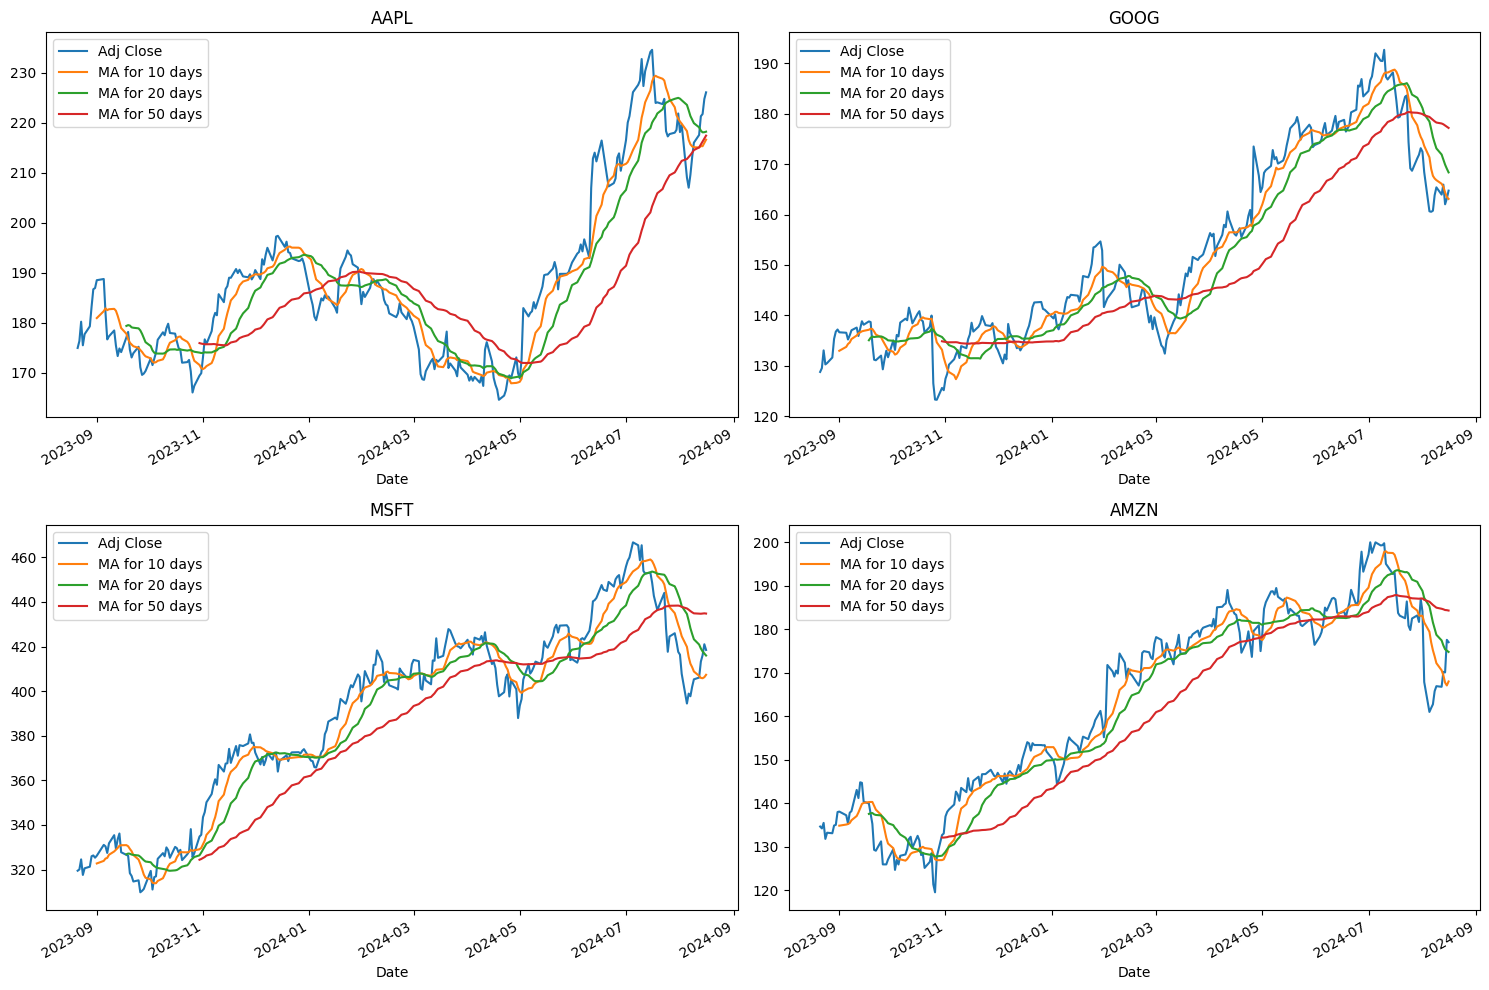

In [13]:
# Plot moving averages
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (stock, data) in enumerate(company_data.items()):
    ax = axes[i // 2, i % 2]
    data[['Adj Close'] + [f"MA for {ma} days" for ma in ma_days]].plot(ax=ax)
    ax.set_title(stock)

fig.tight_layout()


In [14]:
# Calculate daily returns
for data in company_data.values():
    data['Daily Return'] = data['Adj Close'].pct_change()


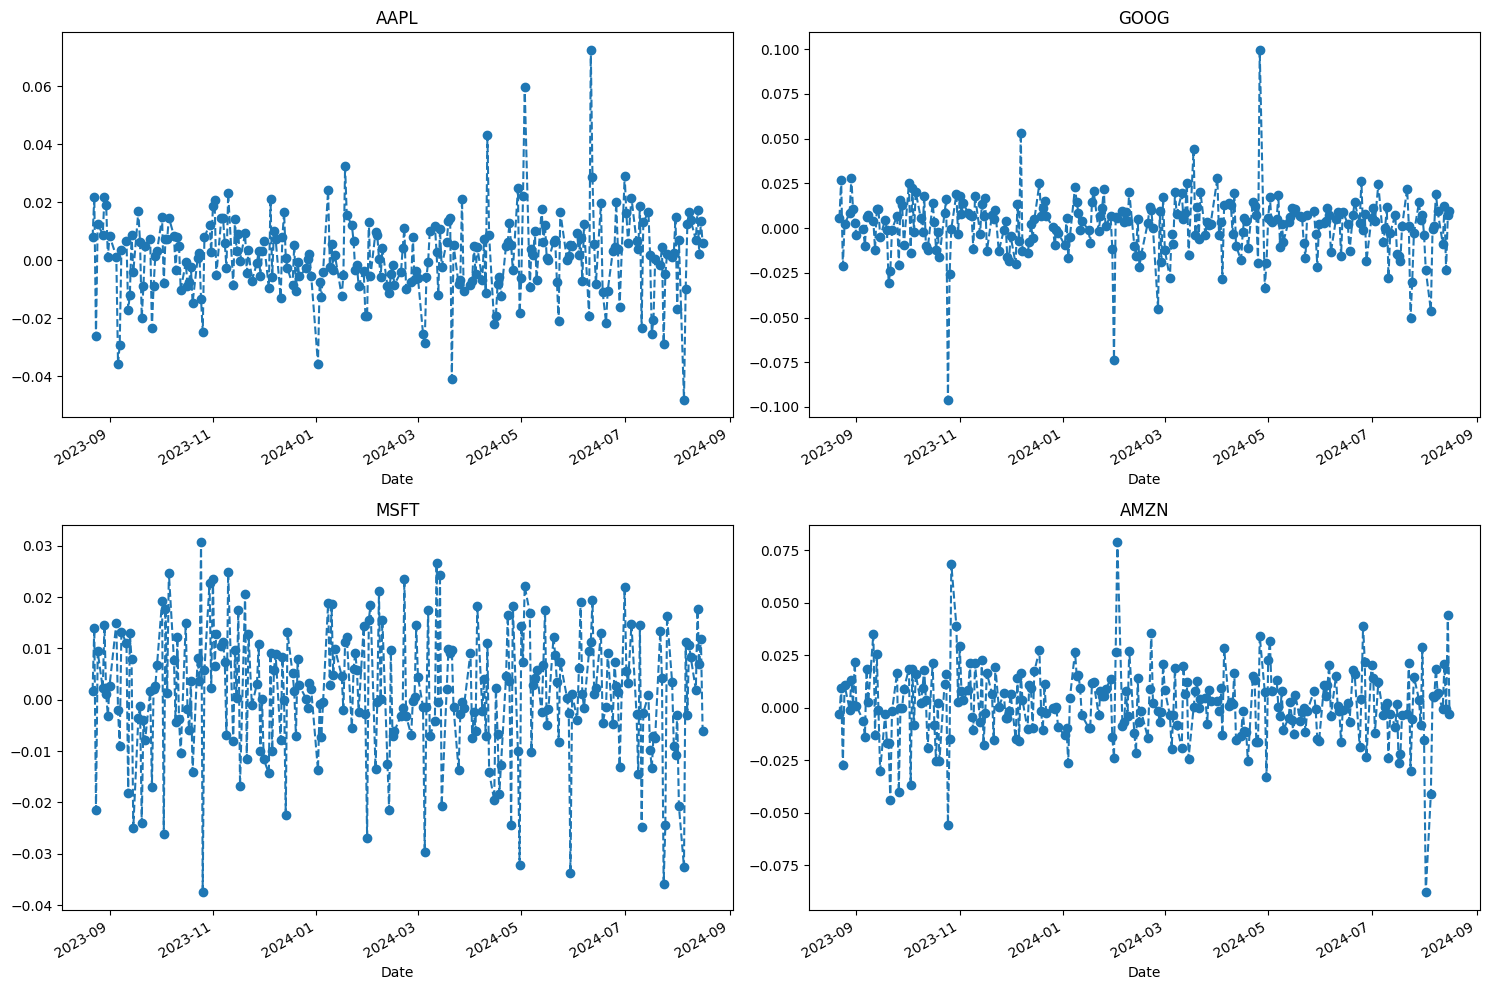

In [15]:
# Plot daily returns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (stock, data) in enumerate(company_data.items()):
    ax = axes[i // 2, i % 2]
    data['Daily Return'].plot(ax=ax, linestyle='--', marker='o')
    ax.set_title(stock)

fig.tight_layout()

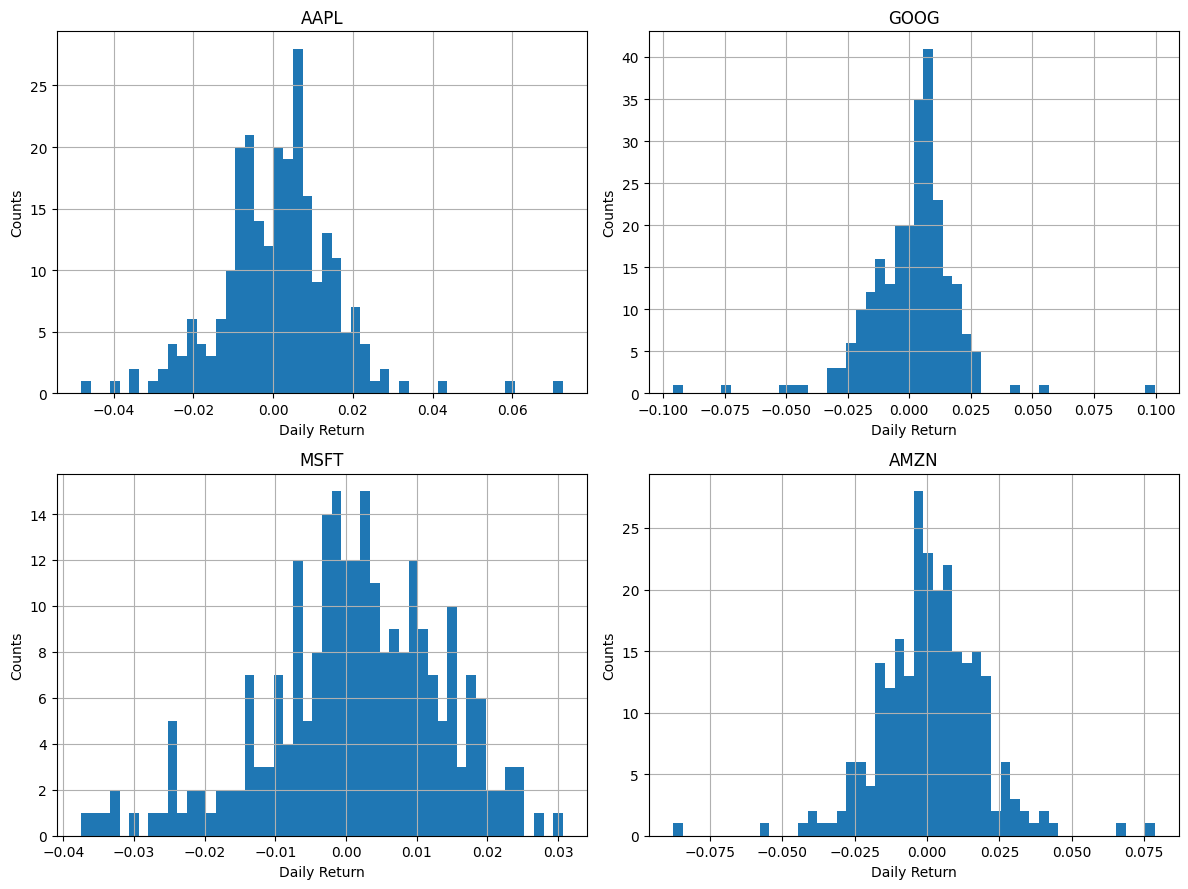

In [16]:
# Histogram of daily returns
plt.figure(figsize=(12, 9))

for i, (stock, data) in enumerate(company_data.items()):
    plt.subplot(2, 2, i + 1)
    data['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{stock}')

plt.tight_layout()

In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']


[*********************100%%**********************]  4 of 4 completed


In [18]:
# Calculate tech returns
tech_rets = closing_df.pct_change()

In [19]:
# Display the first few rows of the returns DataFrame
print(tech_rets.head())

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-08-21       NaN       NaN       NaN       NaN
2023-08-22  0.007905 -0.003193  0.005895  0.001802
2023-08-23  0.021949  0.009460  0.027142  0.014079
2023-08-24 -0.026171 -0.027155 -0.020944 -0.021498
2023-08-25  0.012643  0.010771  0.002070  0.009407


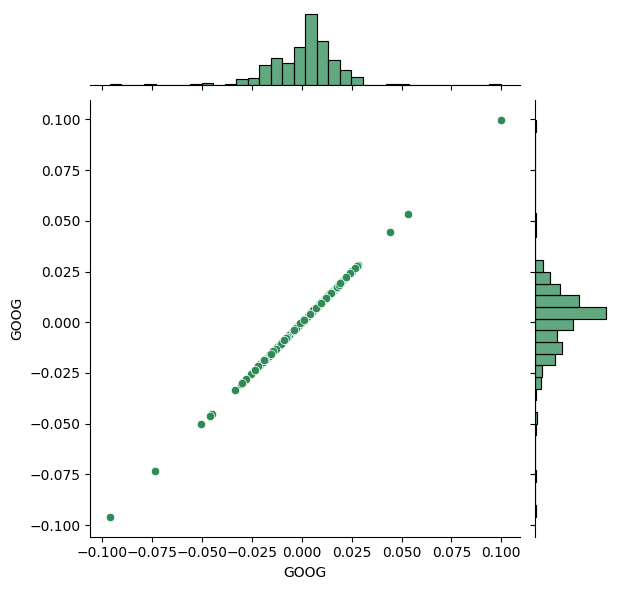

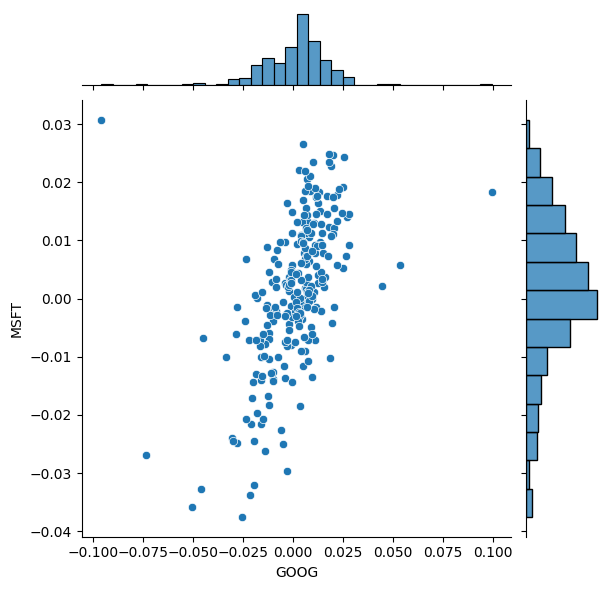

In [20]:
# Scatter plots
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


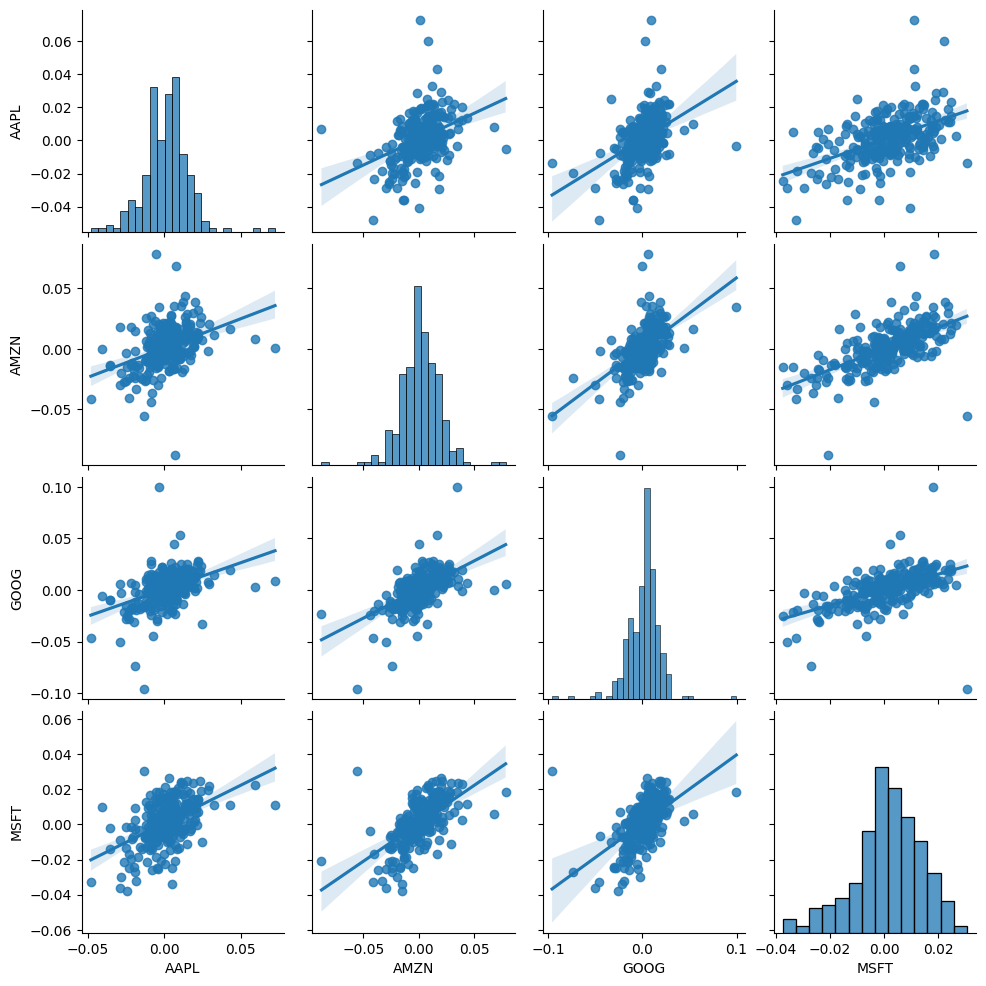

In [21]:
# Pairplot of tech returns
sns.pairplot(tech_rets, kind='reg')

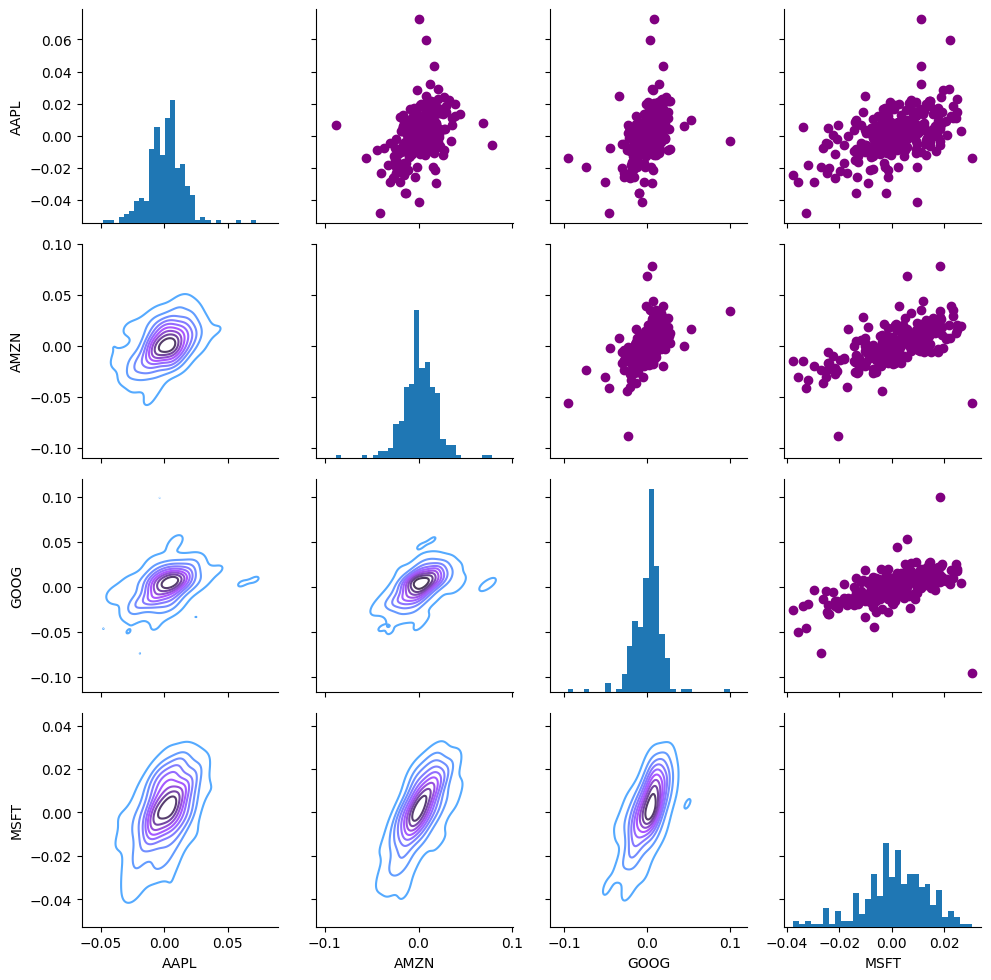

In [22]:
# PairGrid for tech returns
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

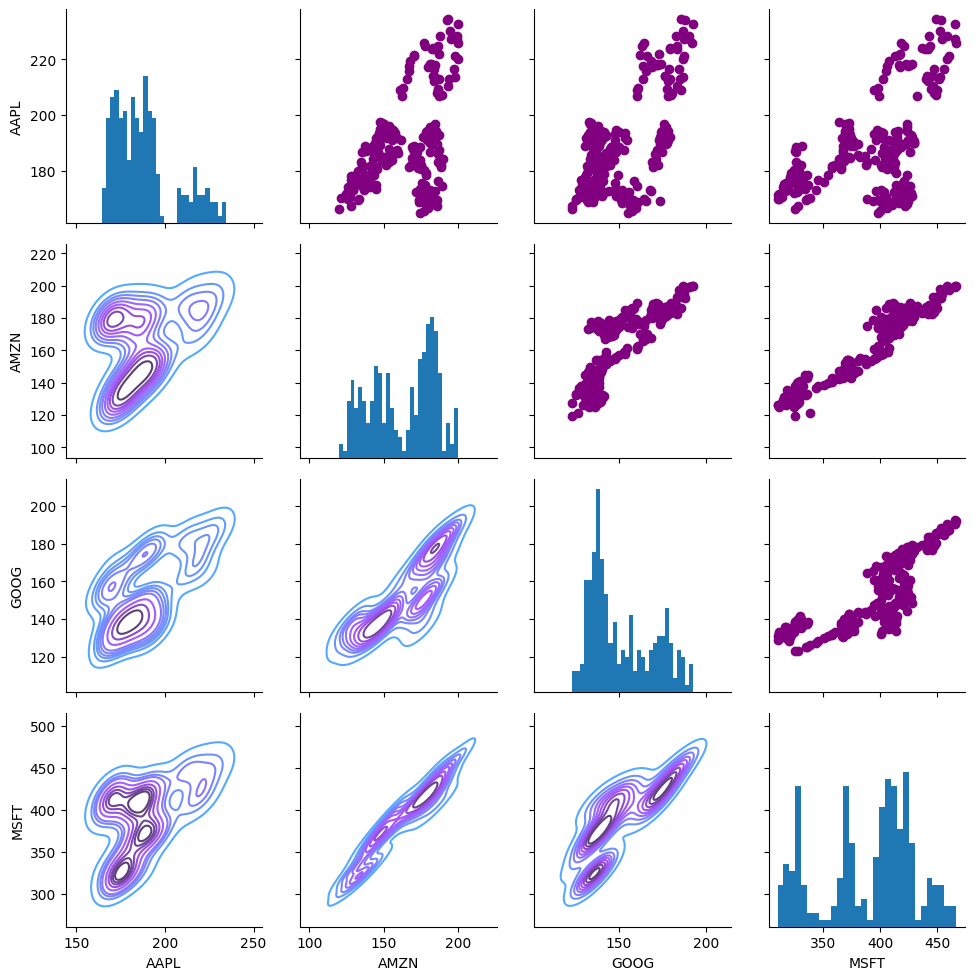

In [23]:
# PairGrid for closing prices
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of Stock Closing Prices')

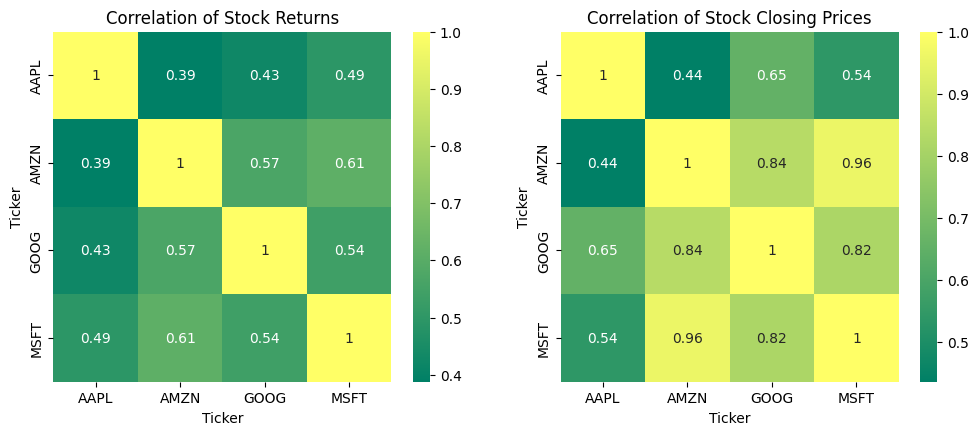

In [24]:
# Correlation heatmaps
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Closing Prices')

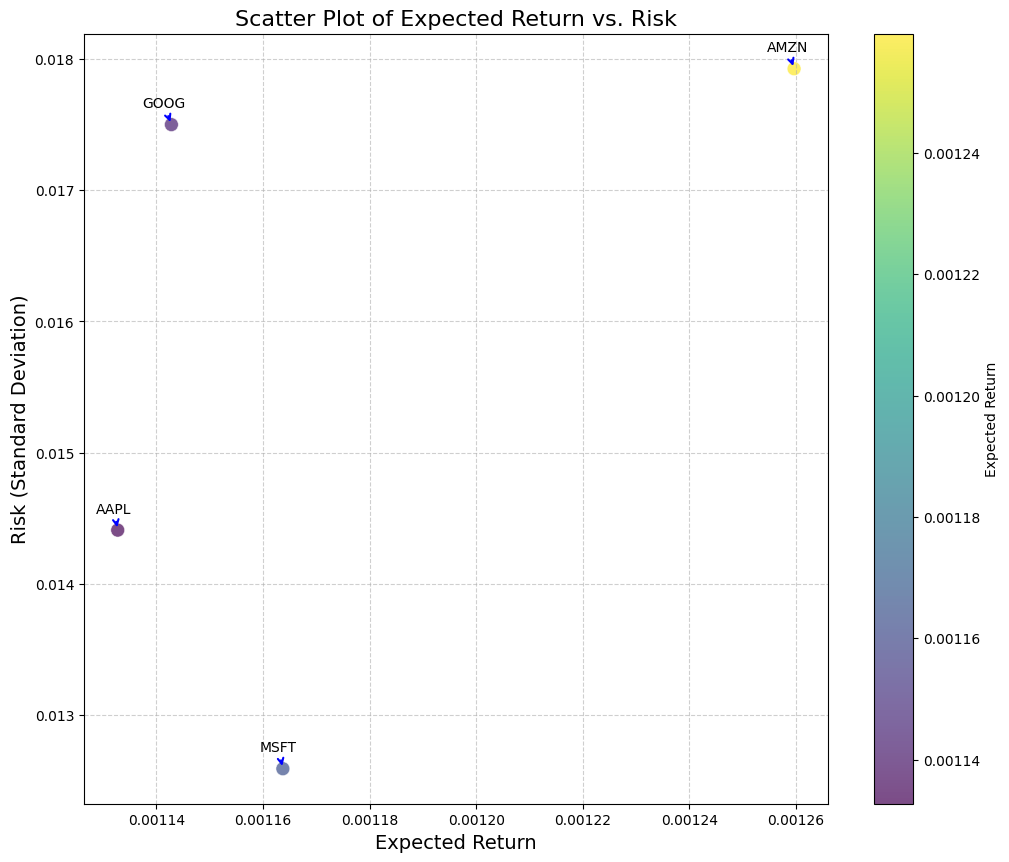

In [26]:
import matplotlib.pyplot as plt

# Scatter plot of expected return vs. risk
rets = tech_rets.dropna()
plt.figure(figsize=(12, 10))

# Scatter plot with color coding and size based on risk
plt.scatter(rets.mean(), rets.std(), s=100, alpha=0.7, c=rets.mean(), cmap='viridis', edgecolors='w', linewidth=0.5)

# Adding color bar for expected return
cbar = plt.colorbar()
cbar.set_label('Expected Return')

# Labels and title
plt.xlabel('Expected Return', fontsize=14)
plt.ylabel('Risk (Standard Deviation)', fontsize=14)
plt.title('Scatter Plot of Expected Return vs. Risk', fontsize=16)

# Annotate each point with its label
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(10, 10), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='blue', lw=1.5))

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()
